In [2]:
import pandas as pd
import re

In [3]:
df = pd.read_pickle('../data/clean_pass_01p1.pkl')

In [14]:
(re.search('Army','ARMY',re.I) is None) == False

True

In [90]:
# get Army
df.emp_title.value_counts()
df['emp_Army'] = df.emp_title.apply(lambda x: (re.search('Army|Military',x ,re.I) is None) == False)

In [17]:
df[~df.emp_Army].emp_title

1                                          Ryder
3                            AIR RESOURCES BOARD
5                           Veolia Transportaton
6                      Southern Star Photography
7                                MKC Accounting 
9                                      Starbucks
10                         Southwest Rural metro
11                                          UCLA
12           Va. Dept of Conservation/Recreation
13                                        Target
14                                         SFMTA
15                      Internal revenue Service
16                             Chin's Restaurant
17                                      Duracell
18                         Connection Inspection
19                  Network Interpreting Service
20              Archdiocese of Galveston Houston
21                                Osram Sylvania
22                                     Value Air
23                              Wells Fargo Bank
24                  

In [91]:
df[df.emp_Army].shape

(476, 47)

In [18]:
# get self
df['emp_Self'] = df.emp_title.apply(lambda x: (re.search('self',x ,re.I) is None) == False)

In [20]:
df[~df.emp_Self & ~df.emp_Army].emp_title

1                                          Ryder
3                            AIR RESOURCES BOARD
5                           Veolia Transportaton
6                      Southern Star Photography
7                                MKC Accounting 
9                                      Starbucks
10                         Southwest Rural metro
11                                          UCLA
12           Va. Dept of Conservation/Recreation
13                                        Target
14                                         SFMTA
15                      Internal revenue Service
16                             Chin's Restaurant
17                                      Duracell
18                         Connection Inspection
19                  Network Interpreting Service
20              Archdiocese of Galveston Houston
21                                Osram Sylvania
22                                     Value Air
23                              Wells Fargo Bank
24                  

In [34]:
df[df.emp_Self].shape

(231, 45)

In [23]:
df_company = pd.read_csv('../data/forbes2013.csv')
df_company.shape

(1984, 7)

In [24]:
df_company.head()

,Rank,Company,Sales($billion),Profits($billion),Assets,Market Value,Country
0,40,Commonwealth Bank,47.8,7.3,735.2,117.5,Australia
1,44,BHP Billiton,72.2,15.4,129.3,184.7,Australia
2,48,Westpac Banking Group,43.9,6.2,699.6,98.9,Australia
3,58,National Australian Bank,49.2,4.2,791.3,76.3,Australia
4,66,ANZ,37.5,5.9,666.9,81.2,Australia


In [30]:
df['emp_KnownCompany'] = df.emp_title.isin(df_company.Company)


In [37]:
df[df.emp_KnownCompany].shape

(1988, 45)

In [36]:
df.shape

(38818, 45)

In [44]:
 df.target.value_counts()

1.0    32976
0.0     5842
Name: target, dtype: int64

In [48]:
df[df.emp_Self | df.emp_Army | df.emp_KnownCompany]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,has_made_pymnt,target,not_policy,emp_Army,emp_Self,emp_KnownCompany
9,5375.0,5375.0,5350.000000,60m,0.1269,121.45,B,B5,Starbucks,0.5,...,2.5200,121.45,Mar-2013,0,1,0.0,False,False,False,True
13,3000.0,3000.0,3000.000000,36m,0.0991,96.68,B,B1,Target,3.0,...,0.0000,102.43,Jun-2016,0,1,1.0,False,False,False,True
76,11000.0,11000.0,11000.000000,36m,0.1349,373.24,C,C1,TX Army National Guard,10.0,...,0.0000,1491.29,Oct-2014,0,1,1.0,False,True,False,False
81,10000.0,10000.0,10000.000000,36m,0.1427,343.09,C,C2,SAP,2.0,...,0.0000,8962.31,Feb-2013,0,1,1.0,False,False,False,True
130,7000.0,7000.0,7000.000000,36m,0.1269,234.82,B,B5,Best Buy,0.5,...,0.0000,238.06,Jan-2015,0,1,1.0,False,False,False,True
149,8450.0,8450.0,8425.000000,60m,0.1677,208.97,D,D2,Best Buy,5.0,...,0.0000,3239.35,Sep-2015,0,1,1.0,False,False,False,True
160,16000.0,16000.0,8150.000000,60m,0.1527,382.92,C,C4,US Army,10.0,...,0.0000,199.56,Nov-2015,0,1,1.0,False,True,False,False
180,14000.0,14000.0,14000.000000,36m,0.1065,456.03,B,B2,MetLife,3.0,...,0.0000,10643.16,Dec-2012,0,1,1.0,False,False,False,True
225,26000.0,26000.0,25975.000000,60m,0.1677,642.96,D,D2,PepsiCo,10.0,...,12.2700,642.96,Jun-2013,0,1,0.0,False,False,False,True
250,4000.0,4000.0,4000.000000,36m,0.1903,146.69,E,E2,IBM,10.0,...,0.0000,785.51,May-2016,0,1,1.0,False,False,False,True


([<matplotlib.axis.XTick at 0x123b4a860>,
 <a list of 2 Text xticklabel objects>)

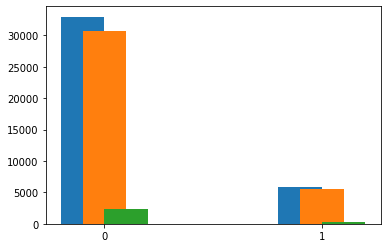

In [56]:
import matplotlib.pyplot as plt 
w = [0.2,0.2]
plt.bar([0-0.1,1-0.1], df.target.value_counts(), width=w)
plt.bar([0,1],df[~df.emp_Self & ~df.emp_Army & ~df.emp_KnownCompany].target.value_counts(), width=w)
plt.bar([0+0.1,1+0.1],df[df.emp_Self | df.emp_Army | df.emp_KnownCompany].target.value_counts(), width=w)
plt.xticks([0,1])
#df[~df.emp_Self & ~df.emp_Army & ~df.emp_KnownCompany].target.plot.hist()

In [27]:
#for e in df[~df.emp_Self & ~df.emp_Army]

df[~df.emp_Self & ~df.emp_Army].emp_title.isin(df_company.Company).value_counts()



False    36168
True      1988
Name: emp_title, dtype: int64

In [29]:
df[~df.emp_Self & ~df.emp_Army][~df[~df.emp_Self & ~df.emp_Army].emp_title.isin(df_company.Company)].emp_title

1                                          Ryder
3                            AIR RESOURCES BOARD
5                           Veolia Transportaton
6                      Southern Star Photography
7                                MKC Accounting 
10                         Southwest Rural metro
11                                          UCLA
12           Va. Dept of Conservation/Recreation
14                                         SFMTA
15                      Internal revenue Service
16                             Chin's Restaurant
17                                      Duracell
18                         Connection Inspection
19                  Network Interpreting Service
20              Archdiocese of Galveston Houston
21                                Osram Sylvania
22                                     Value Air
23                              Wells Fargo Bank
24                               bmg-educational
25                Winfield Pathology Consultants
26                  

In [57]:
# Bank
df['emp_Bank'] = df.emp_title.apply(lambda x: (re.search('bank',x ,re.I) is None) == False)

In [58]:
df[df['emp_Bank']].shape

(933, 46)

In [99]:
# Public employe
df['emp_Public'] = df.emp_title.apply(lambda x: (re.search('city|state|public|district|school|schools|Government|Sheriff|county|civil|police|National Guard',x ,re.I) is None) == False)

In [ ]:
# Courts


In [ ]:
#federal 


In [66]:
x = 'Cit of stat'
(re.search('city|state',x ,re.I) is None) == False

False

In [100]:
df[df['emp_Public']].shape

(3789, 47)

In [81]:
df[df.emp_title == 'Toyotaa'].emp_KnownCompany

Series([], Name: emp_KnownCompany, dtype: bool)

In [83]:
df_company.Company.str.contains('Toyotaa').value_counts()

False    1984
Name: Company, dtype: int64

In [94]:
s = 0
for e in df.emp_title:
    try:
        founds = df_company.Company.str.contains(e).value_counts()
    except:
        print(e)
        
    if len(founds)>1:
        s +=1


/Users/arnescheunemann/opt/anaconda3/envs/nf2/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


New Jersey Institute Of Technology (NJIT
FCCI Insurance Grou[
The Keith Corp. (empl by county, now Kei
Barclays Capital (formerly Lehman Brothe
Dept of VA (NCCPAC
1)-Yavapai Regional Medical Center 2)- Dr. cantors office


In [101]:
s

2464